In [1]:
import time
from tabulate import tabulate
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model, kernel_ridge
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb

from sklearn import preprocessing
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [121]:
data = pd.read_pickle("../full_dataset_with_features.csv")
# data = pd.read_csv("../full_dataset_ints_old.csv")

In [51]:
# Just FYI, this is how many outliers there are above each threshold.
for i in range(1,25):
    print(i,np.sum(data['target']>i))

1 8365
2 4760
3 3239
4 2429
5 1916
6 1561
7 1303
8 1089
9 937
10 813
11 720
12 639
13 563
14 510
15 463
16 423
17 388
18 358
19 334
20 315
21 300
22 279
23 263
24 250


In [122]:
data = data.dropna(axis=0)

In [4]:
data['target'] = [min(t,5) for t in data['target']]
data['target'].max()

5.0

In [ ]:
# Load the data
# data = pd.read_csv("../full_dataset_ints.csv")

In [ ]:
# Not using this anymore

def one_hot_data(data,naics_cols):
    enc = preprocessing.OneHotEncoder()
    enc.fit(data[naics_cols])
    onehotlabels = enc.transform(data[naics_cols]).toarray()
    one_hot_col_names = []
    for lvl in enc.categories_:
        [one_hot_col_names.append("naics_"+str(i)) for i in lvl]
    one_hot_df = pd.DataFrame(onehotlabels,columns=one_hot_col_names)
    data = data.reset_index(drop=True)
    new_data = pd.concat([data,one_hot_df],axis=1)
    new_data = new_data.drop(naics_cols,axis=1)
    new_data = new_data.drop('naics_0',axis=1)
    return new_data,one_hot_col_names

naics_cols = ["naics_2"]#,"naics_3","naics_4","naics_5"]
data,one_hot_col_names = one_hot_data(data,naics_cols)
# Remove naics_0
one_hot_col_names = one_hot_col_names[1:]

In [5]:
feature_cols = ["visits_2020",
"naics_code",
"raw_visitor_counts",
"median_dwell_2020",
"num_visitor_country_of_origin",
"num_visitor_home_cbgs",
"num_related_same_day_brand_2020",
"max_hourly_visits",
"visits_2019",
"distance_from_home_2019",
"median_dwell_2019",
"num_related_same_day_brand_2019",
"change_in_visits",
"visits_2020_lastweek",
"raw_visitor_counts_lastweek",
"median_dwell_2020_lastweek",
"num_visitor_country_of_origin_lastweek",
"num_visitor_home_cbgs_lastweek",
"num_related_same_day_brand_2020_lastweek",
"max_hourly_visits_lastweek",
"visits_2019_lastweek",
"median_dwell_2019_lastweek",
"num_related_same_day_brand_2019_lastweek",
"change_in_visits_lastweek",
"visits_2019_nextweek",
"median_dwell_2019_nextweek",
"num_related_same_day_brand_2019_nextweek",
"naics_2",
"naics_3",
"naics_4",
"naics_5",
"distance_from_home_2019_missing",
"distance_from_home_2019_missing_lastweek",
"distance_from_home_2019_missing_nextweek",
"distance_from_home_2019_lastweek",
"distance_from_home_2019_nextweek",
"closing_of_public_venues_pct",
"non-essential_services_closure_pct",
"school_closure_pct",
"shelter_in_place_pct",
"social_distancing_pct",              
"naics_2_num_biz",
"naics_3_num_biz",
"naics_4_num_biz",
"naics_5_num_biz",
"naics_6_num_biz",
"TMIN",
"TMAX",
"PRCP",
"SNOW",
"WT01",
"WT02",
"WT03",
"WT04",
"WT06",
"WT08",
"WT11",
"cases",
"deaths",
"POPESTIMATE2019",
"Pop_pct_chg_2019",
"emp",
"est"]

scale_cols = ["visits_2020",
"naics_code",
"raw_visitor_counts",
"median_dwell_2020",
"num_visitor_country_of_origin",
"num_visitor_home_cbgs",
"num_related_same_day_brand_2020",
"max_hourly_visits",
"visits_2019",
"distance_from_home_2019",
"median_dwell_2019",
"num_related_same_day_brand_2019",
"change_in_visits",
"visits_2020_lastweek",
"raw_visitor_counts_lastweek",
"median_dwell_2020_lastweek",
"num_visitor_country_of_origin_lastweek",
"num_visitor_home_cbgs_lastweek",
"num_related_same_day_brand_2020_lastweek",
"max_hourly_visits_lastweek",
"visits_2019_lastweek",
"median_dwell_2019_lastweek",
"num_related_same_day_brand_2019_lastweek",
"change_in_visits_lastweek",
"visits_2019_nextweek",
"median_dwell_2019_nextweek",
"num_related_same_day_brand_2019_nextweek",
"naics_2",
"naics_3",
"naics_4",
"naics_5",
"distance_from_home_2019_missing",
"distance_from_home_2019_missing_lastweek",
"distance_from_home_2019_missing_nextweek",
"distance_from_home_2019_lastweek",
"distance_from_home_2019_nextweek",
"closing_of_public_venues_pct",
"non-essential_services_closure_pct",
"school_closure_pct",
"shelter_in_place_pct",
"social_distancing_pct", 
"naics_2_num_biz",
"naics_3_num_biz",
"naics_4_num_biz",
"naics_5_num_biz",
"naics_6_num_biz",
"TMIN",
"TMAX",
"PRCP",
"SNOW",
"WT01",
"WT02",
"WT03",
"WT04",
"WT06",
"WT08",
"WT11",
"cases",
"deaths",
"POPESTIMATE2019",
"Pop_pct_chg_2019",
"emp",
"est"]

# [feature_cols.append(c) for c in one_hot_col_names]

In [6]:
print("Target variance by week\n"+"*"*25)
for week in data['week'].unique():
    ind = data['week']==week
    print("Week {}: {:2.4f}".format(week,np.var(data['target'][ind])))

Target variance by week
*************************
Week 10: 0.8027
Week 11: 0.5826
Week 12: 0.6199
Week 13: 0.5079
Week 14: 0.4683
Week 15: 0.5488


In [7]:
# Make week 15 the test set
test_data = data[data['week']==15]
# Make week 14 the validation set
val_data = data[data['week']==14]
# Make train everything else
train_data = data[data['week']<14]

X_test = test_data[feature_cols].copy()
y_test = test_data['target'].copy()

X_val = val_data[feature_cols].copy()
y_val = val_data['target'].copy()

X_train = train_data[feature_cols].copy()
y_train = train_data['target'].copy()

del(data,test_data,val_data,train_data)

In [8]:
# Variance per week
print("Test variance (Week 15): {:2.4f}".format(np.var(y_test)))
print("Validation variance (Week 14): {:2.4f}".format(np.var(y_val)))
print("Train variance (Week 10-13: {:2.4f}".format(np.var(y_train)))

Test variance (Week 15): 0.5488
Validation variance (Week 14): 0.4683
Train variance (Week 10-13: 0.6360


In [9]:
# Scale everything based on X_train
# scaler = StandardScaler(with_std=False)
scaler = StandardScaler()
scaler.fit(X_train[scale_cols])
X_train[scale_cols] = scaler.transform(X_train[scale_cols])
X_val[scale_cols] = scaler.transform(X_val[scale_cols])
X_test[scale_cols] = scaler.transform(X_test[scale_cols])

### Set param_grid

In [10]:
def lasso_covid(X,y,params):
    reg = linear_model.Lasso(normalize=True)   
    cv_reg = GridSearchCV(reg, 
                          params,
                          n_jobs = 4,
                          cv=5,
                          refit=True)
    cv_reg.fit(X,y)
    return cv_reg

def ridge_covid(X,y,params):
    reg = linear_model.Ridge(normalize=True) 
    cv_reg = GridSearchCV(reg, 
                          params,
                          n_jobs = 4,
                          cv=5,
                          refit=True)
    cv_reg.fit(X,y)
    return cv_reg

def random_forest_covid(X,y,params):
    reg = RandomForestRegressor(n_estimators=100) #oob_score = True?   
    cv_reg = GridSearchCV(reg, 
                          params,
                          n_jobs = -1,
                          cv=5,
                          refit=True)
    cv_reg.fit(X,y)
    return cv_reg

def gradient_boosting_covid(X,y,params):
    reg = GradientBoostingRegressor(n_estimators=100,learning_rate=.1,subsample=1.)     
    cv_reg = GridSearchCV(reg, 
                          params,
                          n_jobs = -1,
                          cv=5,
                          refit=True)
    cv_reg.fit(X,y)
    return cv_reg

def adaboost_covid(X,y,params):
    reg = AdaBoostRegressor(n_estimators=200)     
    cv_reg = GridSearchCV(reg, 
                          params,
                          n_jobs = -1,
                          cv=5,
                          refit=True)
    cv_reg.fit(X,y)
    return cv_reg

def mlp_covid(X,y,params):
    reg = MLPRegressor(hidden_layer_sizes = (2,40))     
    cv_reg = GridSearchCV(reg, 
                          params,
                          n_jobs = -1,
                          cv=5,
                          refit=True)
    cv_reg.fit(X,y)
    return cv_reg

In [11]:
# Validation function
def evaluate(reg_list,X_val,y_val):
    '''
    Inputs:
        reg_list: list of 2-tuples (reg,name)
        X_val: array/DataFrame of features
        y_val: array/series of labels
    
    Output:
        score_df: DF with model name and metrics for each model on validation set
    '''
    score_df = pd.DataFrame(columns=['Model','MSE','MAE','r2'])
    for reg in reg_list:
        mse = mean_squared_error(y_val,reg[0].predict(X_val))
        mae = mean_absolute_error(y_val,reg[0].predict(X_val))
        r2 = r2_score(y_val,reg[0].predict(X_val))
        score_df = score_df.append({'Model':reg[1],'MSE':mse,'MAE':mae,'r2':r2},ignore_index=True)
    return score_df

In [12]:
lasso_params = {'alpha':(1e-7,1e-6,1e-5)}

ridge_params = {'alpha':(1e-7,1e-6,1e-5)}

random_forest_params = {#'n_estimators':(100,500),
                         'max_depth':(None,10)}

gradient_boosting_params = {'n_estimators':(1000,2000),
#                             'learning_rate':(.01,0.1,1.),
#                             'subsample':(0.1,0.5,1.0)
                            }

adaboost_params = {'n_estimators':(100,500),
                   'learning_rate':(1e-3,.1)}

mlp_params = {'alpha':(1e-5,1e-3),
              'hidden_layer_sizes':((2,40),(3,40),(2,100),(5,50),(8,40))
}

In [16]:
a = time.clock()
mlp = mlp_covid(X_train,y_train,mlp_params)
b = time.clock()

In [17]:
print("Run time: {:2.4f}seconds".format(b-a))
gradient_boosting = gradient_boosting_covid(X_train,y_train,gradient_boosting_params)
c = time.clock()
print("Run time: {:2.4f}seconds".format(c-b))

Run time: 43.7717seconds


/home/michael/python-virtual-environments/data/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Run time: 762.5617seconds


In [18]:
adaboost = adaboost_covid(X_train,y_train,adaboost_params)
d = time.clock()
print("Run time: {:2.4f}seconds".format(d-c))

Run time: 99.9015seconds


In [19]:
# Run all the models
# lasso = lasso_covid(X_train,y_train,lasso_params)
# ridge = ridge_covid(X_train,y_train,ridge_params)

random_forest = random_forest_covid(X_train,y_train,random_forest_params)
e = time.clock()
print("Run time: {:2.4f}seconds".format(e-d))

Run time: 387.9810seconds


## The winning XGBoost model

In [42]:
# XGBoost
xgb_params = {
    # Parameters that we are going to tune.
    'max_depth':9,
    'min_child_weight': 8,
    'eta':.2,
    'subsample': 1,
    'colsample_bytree': 1,
    'objective':'reg:squarederror',
    'eval_metric':'mae'
}
XGB_reg = xgb.XGBRegressor(max_depth=9,
    min_child_weight= 8,
    eta=.2,
    subsample= 1,
    colsample_bytree= 1,
    # Other parameters
    objective='reg:squarederror',
    eval_metric='mae')
XGB_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.2, eval_metric='mae',
             gamma=0, importance_type='gain', learning_rate=0.1,
             max_delta_step=0, max_depth=9, min_child_weight=8, missing=None,
             n_estimators=100, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=1, verbosity=1)

In [120]:
training_score_df

,Model,MSE,MAE,r2
0,Lasso,0.486116,0.377819,0.235725
1,Ridge,0.483634,0.376412,0.239628
2,XGB,0.046915,0.133328,0.926240
3,Random Forest,0.016514,0.066772,0.974037
4,Gradient Boosting,0.086762,0.163647,0.863593
5,Adaboost,0.226110,0.298140,0.644508
6,MLP,0.148042,0.191514,0.767247


In [43]:
# Create list of best estimators of each type
reg_list = [(lasso.best_estimator_,"Lasso"),
            (ridge.best_estimator_,"Ridge"),
            (XGB_reg,"XGB"),
            (random_forest.best_estimator_,"Random Forest"),
            (gradient_boosting.best_estimator_,"Gradient Boosting"),
            (adaboost.best_estimator_,"Adaboost"),
            (mlp,"MLP")
           ]
# Training scores
training_score_df = evaluate(reg_list,X_train,y_train)
# Validation scores
val_score_df = evaluate(reg_list,X_val,y_val)

In [44]:
# Print out scores
print("Training:")
print(tabulate(training_score_df,headers=training_score_df.columns))
print("\nValidation:")
print(tabulate(val_score_df,headers=val_score_df.columns))

Training:
    Model                    MSE        MAE        r2
--  -----------------  ---------  ---------  --------
 0  Lasso              0.486116   0.377819   0.235725
 1  Ridge              0.483634   0.376412   0.239628
 2  XGB                0.0469147  0.133328   0.92624
 3  Random Forest      0.0165139  0.0667723  0.974037
 4  Gradient Boosting  0.0867616  0.163647   0.863593
 5  Adaboost           0.22611    0.29814    0.644508
 6  MLP                0.148042   0.191514   0.767247

Validation:
    Model                    MSE       MAE        r2
--  -----------------  ---------  --------  --------
 0  Lasso              0.392031   0.376595  0.162818
 1  Ridge              0.391235   0.375471  0.164518
 2  XGB                0.0744881  0.13261   0.840931
 3  Random Forest      0.0778645  0.133755  0.83372
 4  Gradient Boosting  0.081776   0.162672  0.825367
 5  Adaboost           0.166288   0.251227  0.644893
 6  MLP                0.173936   0.244589  0.62856


In [23]:
# Saving
import pickle
filename = '../models/lasso_model.sav'
pickle.dump(lasso, open(filename, 'wb'))

# Loading
# load_gb = pickle.load(open('../models/gb_model.sav','rb'))

In [24]:
filename = '../models/ridge_model.sav'
pickle.dump(ridge, open(filename, 'wb'))
filename = '../models/rf_model.sav'
pickle.dump(random_forest, open(filename, 'wb'))
filename = '../models/gb_model.sav'
pickle.dump(gradient_boosting, open(filename, 'wb'))
filename = '../models/adaboost_model.sav'
pickle.dump(adaboost, open(filename, 'wb'))
filename = '../models/mlp_model.sav'
pickle.dump(mlp, open(filename, 'wb'))

## Test set

In [ ]:
# Combine train and val
X_train_val = pd.concat([X_train,X_val])
y_train_val = pd.concat([y_train,y_val])

In [116]:
# y_pred = XGB_reg.predict(X_test)
y_pred.shape

(37048,)

In [60]:
# Train the XGB model
XGB_reg.fit(X_train_val,y_train_val)

/home/michael/python-virtual-environments/data/lib/python3.6/site-packages/xgboost/core.py:594: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.2, eval_metric='mae',
             gamma=0, importance_type='gain', learning_rate=0.1,
             max_delta_step=0, max_depth=9, min_child_weight=8, missing=None,
             n_estimators=100, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=1, verbosity=1)

In [62]:
evaluate([(XGB_reg,"XGB")],X_test,y_test)

,Model,MSE,MAE,r2
0,XGB,0.101989,0.157101,0.814153


[]

<Figure size 1800x1800 with 0 Axes>

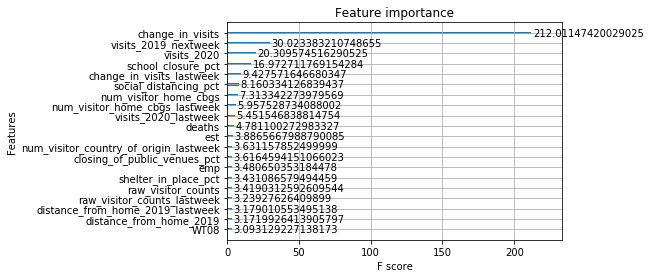

In [78]:
# Feature Importance plot from XGBoost
from xgboost import plot_importance
plt.figure(figsize=[25,25])
ax = plot_importance(XGB_reg,importance_type='gain',max_num_features=20)
ax.plot()

In [99]:
feat_imp_list = []
for i,col in enumerate(X_train_val.columns):
    tup = (col,XGB_reg.feature_importances_[i])
    feat_imp_list.append(tup)

# Sort
feat_imp_arr = np.array(feat_imp_list)
feat_imp_arr = feat_imp_arr[feat_imp_arr[:,1].argsort()][::-1]

In [100]:
feat_imp_arr

array([['change_in_visits', '0.48081136'],
       ['visits_2019_nextweek', '0.068088695'],
       ['visits_2020', '0.046059176'],
       ['school_closure_pct', '0.038491655'],
       ['change_in_visits_lastweek', '0.021380369'],
       ['social_distancing_pct', '0.018506458'],
       ['num_visitor_home_cbgs', '0.016585601'],
       ['num_visitor_home_cbgs_lastweek', '0.013510813'],
       ['visits_2020_lastweek', '0.012363319'],
       ['deaths', '0.010842844'],
       ['est', '0.008814172'],
       ['num_visitor_country_of_origin_lastweek', '0.008234941'],
       ['closing_of_public_venues_pct', '0.008201607'],
       ['emp', '0.007893612'],
       ['shelter_in_place_pct', '0.007781208'],
       ['raw_visitor_counts', '0.007753868'],
       ['raw_visitor_counts_lastweek', '0.00734621'],
       ['distance_from_home_2019_lastweek', '0.0072095366'],
       ['distance_from_home_2019', '0.0071936203'],
       ['WT08', '0.0070147696'],
       ['naics_2_num_biz', '0.0069763497'],
       ['WT

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text yticklabel objects>)

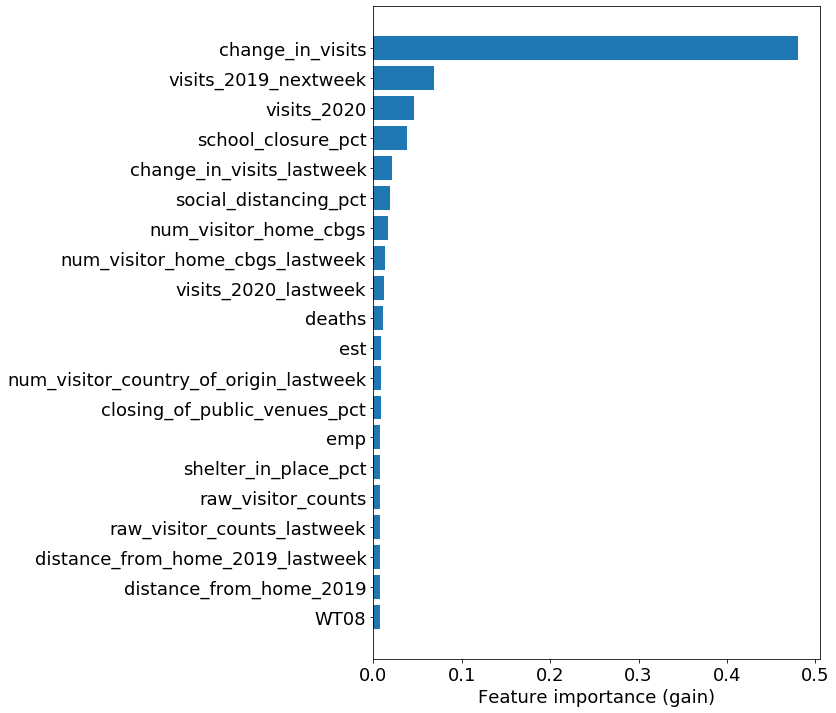

In [119]:
chart_labels = feat_imp_arr[:20,0]
chart_height = [float(feat_imp_arr[i,1]) for i in range(20)]
plt.figure(figsize=[8,12])
plt.barh(chart_labels,chart_height)
plt.gca().invert_yaxis()
plt.xlabel("Feature importance (gain)",fontsize=18)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

In [106]:
chart_labels

array(['change_in_visits', 'visits_2019_nextweek', 'visits_2020',
       'school_closure_pct', 'change_in_visits_lastweek',
       'social_distancing_pct', 'num_visitor_home_cbgs',
       'num_visitor_home_cbgs_lastweek', 'visits_2020_lastweek', 'deaths',
       'est', 'num_visitor_country_of_origin_lastweek',
       'closing_of_public_venues_pct', 'emp', 'shelter_in_place_pct',
       'raw_visitor_counts', 'raw_visitor_counts_lastweek',
       'distance_from_home_2019_lastweek', 'distance_from_home_2019',
       'WT08'], dtype='<U40')

In [118]:
pd.Series(y_test).to_csv("y_test.csv")
pd.Series(y_pred).to_csv("y_pred.csv")
X_test.to_csv("X_test.csv")

/home/michael/python-virtual-environments/data/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.
/home/michael/python-virtual-environments/data/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


In [97]:
feat_imp_arr

array([['change_in_visits', '0.48081136'],
       ['visits_2019_nextweek', '0.068088695'],
       ['visits_2020', '0.046059176'],
       ['school_closure_pct', '0.038491655'],
       ['change_in_visits_lastweek', '0.021380369'],
       ['social_distancing_pct', '0.018506458'],
       ['num_visitor_home_cbgs', '0.016585601'],
       ['num_visitor_home_cbgs_lastweek', '0.013510813'],
       ['visits_2020_lastweek', '0.012363319'],
       ['deaths', '0.010842844'],
       ['est', '0.008814172'],
       ['num_visitor_country_of_origin_lastweek', '0.008234941'],
       ['closing_of_public_venues_pct', '0.008201607'],
       ['emp', '0.007893612'],
       ['shelter_in_place_pct', '0.007781208'],
       ['raw_visitor_counts', '0.007753868'],
       ['raw_visitor_counts_lastweek', '0.00734621'],
       ['distance_from_home_2019_lastweek', '0.0072095366'],
       ['distance_from_home_2019', '0.0071936203'],
       ['WT08', '0.0070147696'],
       ['naics_2_num_biz', '0.0069763497'],
       ['WT

#### XGBoost parameter tuning (don't worry about this part)
Source: https://blog.cambridgespark.com/hyperparameter-tuning-in-xgboost-4ff9100a3b2f

In [31]:
# XGB_reg = xgb.XGBRegressor(eta= .01, objective='reg:squarederror')
# XGB_reg.fit(X_train,y_train)

dtrain = xgb.DMatrix(X_train[:133300],label=y_train[:133300])
dval = xgb.DMatrix(X_train[133300:],label=y_train[133300:])


num_boost_round = 33 # MAE of 0.136

model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dval, "Test")],
    early_stopping_rounds=10
)
print("Best MAE: {:.2f} with {} rounds".format(
                 model.best_score,
                 model.best_iteration+1))

[0]	Test-mae:0.848544
Will train until Test-mae hasn't improved in 10 rounds.
[1]	Test-mae:0.621056
[2]	Test-mae:0.465628
[3]	Test-mae:0.359769
[4]	Test-mae:0.288676
[5]	Test-mae:0.239919
[6]	Test-mae:0.208786
[7]	Test-mae:0.188483
[8]	Test-mae:0.174669
[9]	Test-mae:0.168459
[10]	Test-mae:0.162461
[11]	Test-mae:0.158734
[12]	Test-mae:0.156027
[13]	Test-mae:0.155022
[14]	Test-mae:0.154472
[15]	Test-mae:0.153184
[16]	Test-mae:0.152929
[17]	Test-mae:0.152577
[18]	Test-mae:0.152036
[19]	Test-mae:0.151881
[20]	Test-mae:0.151852
[21]	Test-mae:0.15155
[22]	Test-mae:0.150997
[23]	Test-mae:0.150321
[24]	Test-mae:0.150278
[25]	Test-mae:0.149874
[26]	Test-mae:0.149706
[27]	Test-mae:0.149644
[28]	Test-mae:0.149818
[29]	Test-mae:0.149764
[30]	Test-mae:0.149637
[31]	Test-mae:0.149682
[32]	Test-mae:0.149518
Best MAE: 0.15 with 33 rounds


In [34]:
dtrain = xgb.DMatrix(X_train[:133300],label=y_train[:133300])
dval = xgb.DMatrix(X_val,label=y_val[133300:])

params = {
    # Parameters that we are going to tune.
    'max_depth':9,
    'min_child_weight': 8,
    'eta':.2,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:squarederror',
    'eval_metric':'mae'
}
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

In [32]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=33,
    seed=17,
    nfold=5,
    metrics={'mae'},
    )
cv_results

,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,0.820291,0.000461,0.821161,0.001964
1,0.607053,0.000356,0.608826,0.002084
2,0.462569,0.000503,0.465070,0.002169
3,0.365205,0.000437,0.368543,0.002735
4,0.301279,0.000398,0.305738,0.002812
...,...,...,...,...
95,0.147847,0.000731,0.178996,0.001744
96,0.147648,0.000719,0.179006,0.001710
97,0.147492,0.000707,0.179028,0.001728
98,0.147315,0.000658,0.179026,0.001703


In [ ]:
# Identify the zero-weighted features from lasso
for i in range(61):
    if abs(lasso.best_estimator_.coef_[i])==0:
        print(X_train.columns[i])

In [33]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(5,15,2)
    for min_child_weight in range(4,10,2)
]

# Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with max_depth=5, min_child_weight=4


/home/michael/python-virtual-environments/data/lib/python3.6/site-packages/ipykernel_launcher.py:29: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


	MAE 0.184 for 32 rounds
CV with max_depth=5, min_child_weight=6
	MAE 0.18367 for 32 rounds
CV with max_depth=5, min_child_weight=8
	MAE 0.18391459999999998 for 32 rounds
CV with max_depth=7, min_child_weight=4
	MAE 0.18030739999999998 for 32 rounds
CV with max_depth=7, min_child_weight=6
	MAE 0.1808206 for 32 rounds
CV with max_depth=7, min_child_weight=8
	MAE 0.1803672 for 32 rounds
CV with max_depth=9, min_child_weight=4
	MAE 0.1807626 for 31 rounds
CV with max_depth=9, min_child_weight=6
	MAE 0.1811182 for 32 rounds
CV with max_depth=9, min_child_weight=8
	MAE 0.1800506 for 31 rounds
CV with max_depth=11, min_child_weight=4
	MAE 0.1828152 for 30 rounds
CV with max_depth=11, min_child_weight=6
	MAE 0.182646 for 31 rounds
CV with max_depth=11, min_child_weight=8
	MAE 0.1827732 for 31 rounds
CV with max_depth=13, min_child_weight=4
	MAE 0.185885 for 24 rounds
CV with max_depth=13, min_child_weight=6
	MAE 0.1854198 for 19 rounds
CV with max_depth=13, min_child_weight=8
	MAE 0.185174999

In [35]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=1.0, colsample=1.0


/home/michael/python-virtual-environments/data/lib/python3.6/site-packages/ipykernel_launcher.py:28: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


	MAE 0.1800506 for 31 rounds
CV with subsample=1.0, colsample=0.9
	MAE 0.180634 for 32 rounds
CV with subsample=1.0, colsample=0.8
	MAE 0.18107020000000001 for 32 rounds
CV with subsample=1.0, colsample=0.7
	MAE 0.18068399999999998 for 32 rounds
CV with subsample=0.9, colsample=1.0
	MAE 0.18115940000000003 for 30 rounds
CV with subsample=0.9, colsample=0.9
	MAE 0.1812616 for 32 rounds
CV with subsample=0.9, colsample=0.8
	MAE 0.18202820000000003 for 31 rounds
CV with subsample=0.9, colsample=0.7
	MAE 0.18237399999999998 for 31 rounds
CV with subsample=0.8, colsample=1.0
	MAE 0.1825118 for 30 rounds
CV with subsample=0.8, colsample=0.9
	MAE 0.18280639999999998 for 31 rounds
CV with subsample=0.8, colsample=0.8
	MAE 0.1829424 for 30 rounds
CV with subsample=0.8, colsample=0.7
	MAE 0.1831692 for 32 rounds
CV with subsample=0.7, colsample=1.0
	MAE 0.18346860000000004 for 24 rounds
CV with subsample=0.7, colsample=0.9
	MAE 0.18403260000000002 for 30 rounds
CV with subsample=0.7, colsample=0

In [40]:
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    %time cv_results = xgb.cv(params,dtrain,num_boost_round=num_boost_round,seed=42,nfold=5,metrics=['mae'],early_stopping_rounds=10)
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

CV with eta=0.3
CPU times: user 1min 10s, sys: 512 ms, total: 1min 10s
Wall time: 1min 10s
	MAE 0.1846006 for 28 rounds

CV with eta=0.2


/home/michael/python-virtual-environments/data/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  # This is added back by InteractiveShellApp.init_path()


CPU times: user 1min 11s, sys: 488 ms, total: 1min 12s
Wall time: 1min 12s
	MAE 0.1823712 for 32 rounds

CV with eta=0.1
CPU times: user 1min 13s, sys: 516 ms, total: 1min 14s
Wall time: 1min 14s
	MAE 0.19541219999999998 for 32 rounds

CV with eta=0.05
CPU times: user 1min 13s, sys: 436 ms, total: 1min 14s
Wall time: 1min 14s
	MAE 0.31218899999999994 for 32 rounds

CV with eta=0.01
CPU times: user 1min 12s, sys: 536 ms, total: 1min 13s
Wall time: 1min 13s
	MAE 0.8385532 for 32 rounds

Best params: 0.2, MAE: 0.1823712


In [127]:
X_train.shape[0]+X_val.shape[0]+X_test.shape[0]

222263

In [128]:
X_test.shape[1]

63